Titanic question:
to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv(os.path.join('./', 'titanic_train.csv'))
test = pd.read_csv(os.path.join('./', 'titanic_test.csv'))

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

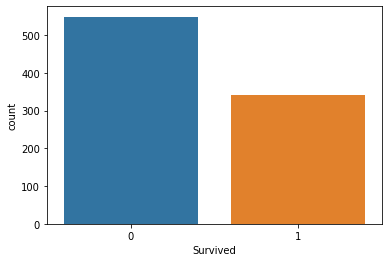

In [8]:
sns.countplot(train['Survived'])

In [9]:
train['Survived'].groupby(train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

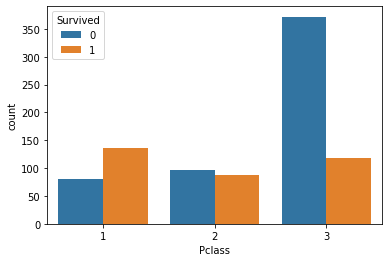

In [10]:
sns.countplot(train['Pclass'], hue=train['Survived'])

In [11]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [12]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Don.           1
Lady.          1
the            1
Ms.            1
Mme.           1
Capt.          1
Jonkheer.      1
Sir.           1
Name: Name_Title, dtype: int64

In [13]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [14]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [15]:
pd.qcut(train['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

In [16]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [17]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [18]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [19]:
train['Survived'].groupby(train['Age']).mean()

Age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: Survived, Length: 88, dtype: float64

In [20]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [21]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [22]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [23]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [ ]:
train['Parch'].value_counts()

In [24]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [26]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [27]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [28]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])

In [29]:
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
S     65
P     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [30]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [36]:
pd.qcut(train['Fare'], 30).value_counts()

(7.55, 7.75]          48
(7.854, 7.896]        44
(7.925, 8.05]         44
(12.958, 13.0]        42
(-0.001, 7.05]        36
(7.05, 7.229]         34
(9.5, 10.5]           34
(27.0, 30.0]          33
(62.439, 77.958]      32
(25.929, 26.0]        31
(77.958, 90.0]        30
(52.369, 62.439]      30
(33.0, 39.688]        30
(21.679, 25.929]      30
(18.762, 21.679]      30
(15.678, 18.762]      30
(146.521, 512.329]    29
(90.0, 146.521]       28
(14.454, 15.678]      28
(26.0, 27.0]          28
(30.0, 33.0]          28
(39.688, 52.369]      27
(10.5, 12.958]        23
(8.05, 8.662]         23
(7.775, 7.854]        23
(7.229, 7.55]         22
(8.662, 9.5]          21
(13.0, 14.454]        19
(7.896, 7.925]        18
(7.75, 7.775]         16
Name: Fare, dtype: int64

In [37]:
train['Survived'].groupby(pd.qcut(train['Fare'], 30)).mean()

Fare
(-0.001, 7.05]        0.055556
(7.05, 7.229]         0.235294
(7.229, 7.55]         0.136364
(7.55, 7.75]          0.333333
(7.75, 7.775]         0.187500
(7.775, 7.854]        0.304348
(7.854, 7.896]        0.113636
(7.896, 7.925]        0.444444
(7.925, 8.05]         0.136364
(8.05, 8.662]         0.130435
(8.662, 9.5]          0.190476
(9.5, 10.5]           0.323529
(10.5, 12.958]        0.608696
(12.958, 13.0]        0.380952
(13.0, 14.454]        0.315789
(14.454, 15.678]      0.285714
(15.678, 18.762]      0.533333
(18.762, 21.679]      0.433333
(21.679, 25.929]      0.433333
(25.929, 26.0]        0.483871
(26.0, 27.0]          0.642857
(27.0, 30.0]          0.333333
(30.0, 33.0]          0.464286
(33.0, 39.688]        0.333333
(39.688, 52.369]      0.333333
(52.369, 62.439]      0.733333
(62.439, 77.958]      0.500000
(77.958, 90.0]        0.766667
(90.0, 146.521]       0.821429
(146.521, 512.329]    0.689655
Name: Survived, dtype: float64

In [4]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [5]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [6]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [7]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [13]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [14]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [9]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [15]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [12]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [17]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [18]:
train = pd.read_csv(os.path.join('../input', 'titanic_train.csv'))
test = pd.read_csv(os.path.join('../input', 'titanic_test.csv'))
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

In [19]:
train.shape

(891, 45)

In [20]:
train.head()

,Survived,Age,Fare,Name_Len,Age_Null_Flag,"Cabin_num_(1.999, 28.667]","Cabin_num_(28.667, 65.667]","Cabin_num_(65.667, 148.0]",Ticket_Len,Pclass_3,...,Name_Title_Mrs.,Name_Title_Miss.,Name_Title_Master.,Name_Title_Rev.,Name_Title_Dr.,Name_Title_Ms.,Name_Title_Col.,Fam_Size_Nuclear,Fam_Size_Solo,Fam_Size_Big
0,0,22.0,7.2500,23,0,0,0,0,9,1,...,0,0,0,0,0,0,0,1,0,0
1,1,38.0,71.2833,51,0,0,0,1,8,0,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,22,0,0,0,0,16,1,...,0,1,0,0,0,0,0,0,1,0
3,1,35.0,53.1000,44,0,0,0,1,6,0,...,1,0,0,0,0,0,0,1,0,0
4,0,35.0,8.0500,24,0,0,0,0,6,1,...,0,0,0,0,0,0,0,0,1,0


In [21]:
print(len(train.columns))

45


In [22]:
train.columns

Index(['Survived', 'Age', 'Fare', 'Name_Len', 'Age_Null_Flag',
       'Cabin_num_(1.999, 28.667]', 'Cabin_num_(28.667, 65.667]',
       'Cabin_num_(65.667, 148.0]', 'Ticket_Len', 'Pclass_3', 'Pclass_1',
       'Pclass_2', 'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C',
       'Embarked_Q', 'Ticket_Lett_A', 'Ticket_Lett_P', 'Ticket_Lett_S',
       'Ticket_Lett_1', 'Ticket_Lett_3', 'Ticket_Lett_2', 'Ticket_Lett_C',
       'Ticket_Lett_Low_ticket', 'Ticket_Lett_Other_ticket', 'Cabin_Letter_n',
       'Cabin_Letter_C', 'Cabin_Letter_E', 'Cabin_Letter_G', 'Cabin_Letter_D',
       'Cabin_Letter_A', 'Cabin_Letter_B', 'Cabin_Letter_F', 'Name_Title_Mr.',
       'Name_Title_Mrs.', 'Name_Title_Miss.', 'Name_Title_Master.',
       'Name_Title_Rev.', 'Name_Title_Dr.', 'Name_Title_Ms.',
       'Name_Title_Col.', 'Fam_Size_Nuclear', 'Fam_Size_Solo', 'Fam_Size_Big'],
      dtype='object')

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 0])

print(gs.bestscore)
print(gs.bestparams)
print(gs.cvresults)

AttributeError: 'GridSearchCV' object has no attribute 'bestscore'

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

https://www.kaggle.com/zlatankr/titanic-random-forest-82-78